## Tabular Files

In [1]:
#import packages
import os

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Download and open the .csv using pandas
avg_monthly_precip = pd.read_csv(
    "https://ndownloader.figshare.com/files/12710618")

#View the data that just downloaded and opened
avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


In Pandas, this table format is referred to as a `dataframe`. You can view some stats about the `dataframe` including the number of columns and rows in the data using `.info()`

In [3]:
avg_monthly_precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   months   12 non-null     object 
 1   precip   12 non-null     float64
 2   seasons  12 non-null     object 
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


Plot the data using `.plot()`

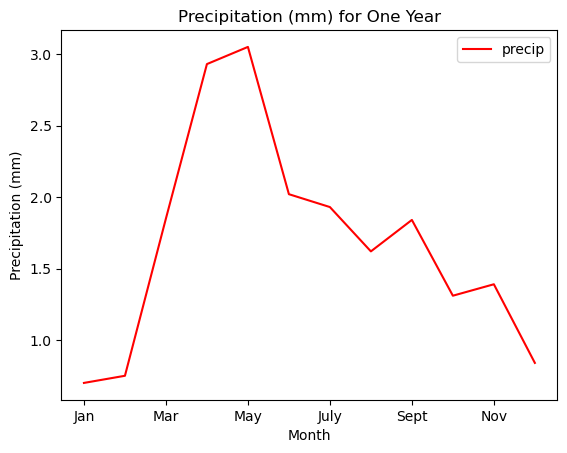

In [9]:
#Plot the data
f, ax = plt.subplots()
avg_monthly_precip.plot(x = "months",
                       y = "precip",
                       title = "Precipitation (mm) for One Year",
                        color= "red",
                        s
                       ax = ax)
ax.set(xlabel="Month",
      ylabel="Precipitation (mm)")
plt.show()

In [12]:
#check data type
type(avg_monthly_precip)

pandas.core.frame.DataFrame

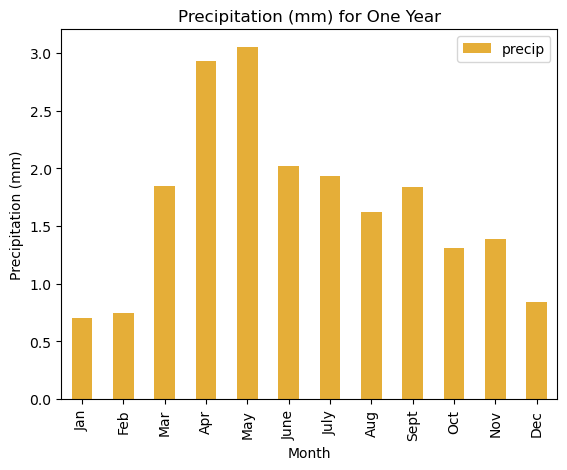

In [16]:
f, ax = plt.subplots()
avg_monthly_precip.plot(x="months",
                        y="precip",
                        title="Precipitation (mm) for One Year",
                        kind="bar",
                        color='#e5ae38',
                        ax=ax)
ax.set(xlabel='Month',
       ylabel='Precipitation (mm)')
plt.show()

## Cleaning tabular text files

**Missing Data Values & Headers in Text Files**


Not all text files are as simple as the example above. Many text files have several lines of header text above the data that provide you with useful information about the data itself. This data is referred to as metadata.

Also, often times, there are data missing from the data that were collected. These missing values will be identified using a specific value that is hopefully documented in the metadata for that file.

Next you will explore some temperature data that need to be cleaned up.

***
Data Tip: You can visit the NOAA NCDC website to learn more about the data you are using below.

Miami, Florida CSV: https://www.ncdc.noaa.gov/cag/city/time-series/USW00012839-tmax-12-12-1895-2020.csv

Seattle, Washington CSV: https://www.ncdc.noaa.gov/cag/city/time-series/USW00013895-tmax-1-5-1895-2020.csv
***

In [6]:
#Open temperature data for Miami, Florida
miami_temp_url = "https://www.ncdc.noaa.gov/cag/city/time-series/USW00012839-tmax-12-12-1895-2020.csv"
miami_temp = pd.read_csv(miami_temp_url)

miami_temp

,Miami,Florida,Maximum Temperature,January-December
0,Units: Degrees Fahrenheit,NaN,NaN,NaN
1,Missing: -99,NaN,NaN,NaN
2,Date,Value,NaN,NaN
3,194812,85.0,NaN,NaN
4,194912,84.4,NaN,NaN
...,...,...,...,...
71,201612,84.6,NaN,NaN
72,201712,85.9,NaN,NaN
73,201812,84.5,NaN,NaN
74,201912,85.9,NaN,NaN


***Notice that the data above contain a few extra rows of information. This information however is important for you to understand.***

Missing: -99 – this is the value that represents the “no data” value. Missing data might occur if a sensor stops working or a measurement isn’t recorded. You will want to remove any missing data values.

Units: Degrees Fahrenheit – it’s always important to first understand the units of the data before you try to interpret what the data are showing!

Below you will use all of the information stored in the header to import your data. You will also remove the first few rows of data because they don’t actually contain any data values. These rows contain metadata.

In [7]:
miami_temp = pd.read_csv(miami_temp_url,
                        skiprows=3,  
                        na_values=-99)

miami_temp

,Date,Value
0,194812,85.0
1,194912,84.4
2,195012,83.6
3,195112,84.0
4,195212,84.6
...,...,...
68,201612,84.6
69,201712,85.9
70,201812,84.5
71,201912,85.9


In [8]:
#Rename header
miami_temp.columns = ["date", "temp_f"]

In [13]:
miami_temp.head()

,date,temp_f
0,194812,85.0
1,194912,84.4
2,195012,83.6
3,195112,84.0
4,195212,84.6


In [14]:
type(miami_temp)

pandas.core.frame.DataFrame

### Add new column (calculate celcius)

In [17]:
miami_temp["temp_c"]= (miami_temp["temp_f"] - 32 ) * (5/9)

In [18]:
miami_temp

,date,temp_f,temp_c
0,194812,85.0,29.444444
1,194912,84.4,29.111111
2,195012,83.6,28.666667
3,195112,84.0,28.888889
4,195212,84.6,29.222222
...,...,...,...
68,201612,84.6,29.222222
69,201712,85.9,29.944444
70,201812,84.5,29.166667
71,201912,85.9,29.944444


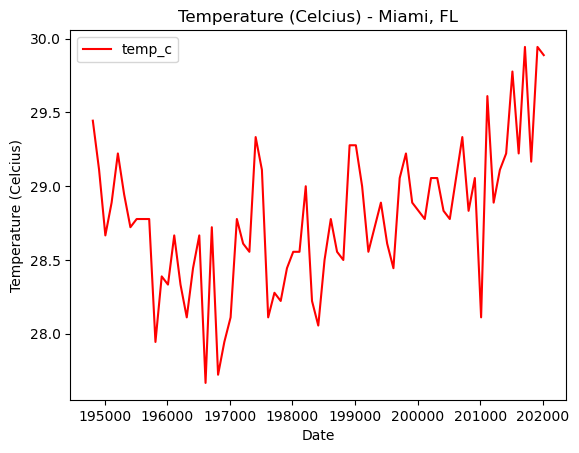

In [19]:
mi, ax = plt.subplots()
miami_temp.plot(x="date",
                y="temp_c",
                title="Temperature (Celcius) - Miami, FL",
                kind="line",
                color='red',
                ax=ax)
ax.set(xlabel='Date',
       ylabel='Temperature (Celcius)')
plt.show()

In [51]:
miami_temp.head()

,date,temp_f
0,194812,85.0
1,194912,84.4
2,195012,83.6
3,195112,84.0
4,195212,84.6


In [50]:
#Temperature at Montgomery, Alabama

wa_temp_url = "https://www.ncdc.noaa.gov/cag/city/time-series/USW00013895-tmax-1-5-1895-2020.csv"
wa_temp = pd.read_csv(wa_temp_url,
                        skiprows=3,  
                        na_values=-99)

wa_temp.head()

,Date,Value
0,194805,88.2
1,194905,88.0
2,195005,87.5
3,195105,87.0
4,195205,85.8


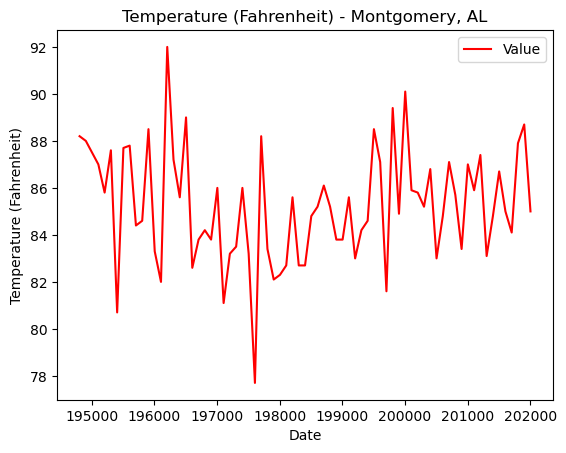

In [52]:
f, ax = plt.subplots()
wa_temp.plot(x="Date",
                y="Value",
                title="Temperature (Fahrenheit) - Montgomery, AL",
                kind="line",
                color='red',
                ax=ax)
ax.set(xlabel='Date',
       ylabel='Temperature (Fahrenheit)')
plt.show()

### CO2 Emissions at Barrow


In [71]:
# Download greenhouse gas CO2 data
import urllib.request
import pandas as pd
greenhouse_gas_url = "ftp://aftp.cmdl.noaa.gov/data/trace_gases/co2/in-situ/surface/brw/co2_brw_surface-insitu_1_ccgg_MonthlyData.txt"

urllib.request.urlretrieve(url=greenhouse_gas_url,
                           filename="co2-emissions-barrow.csv")


('co2-emissions-barrow.csv', <email.message.Message at 0x1e877715e50>)

In [104]:
emissions = pd.read_csv('co2-emissions-barrow.csv',
                       skiprows=149,
                       na_values=-999.99,
                        delimiter=r"\s+")

In [105]:
emissions

,site_code,year,month,day,hour,minute,second,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag
0,BRW,1973,1,1,0,0,0,1973.000000,NaN,-99.99,0,71.323,-156.611,1.10,11.0,-9.90,*..
1,BRW,1973,2,1,0,0,0,1973.084932,NaN,-99.99,0,71.323,-156.611,1.10,11.0,-9.90,*..
2,BRW,1973,3,1,0,0,0,1973.161644,NaN,-99.99,0,71.323,-156.611,1.10,11.0,-9.90,*..
3,BRW,1973,4,1,0,0,0,1973.246575,NaN,-99.99,0,71.323,-156.611,1.10,11.0,-9.90,*..
4,BRW,1973,5,1,0,0,0,1973.328767,NaN,-99.99,0,71.323,-156.611,1.10,11.0,-9.90,*..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,BRW,2021,8,1,0,0,0,2021.580822,405.03,1.55,28,71.323,-156.611,27.46,11.0,16.46,...
584,BRW,2021,9,1,0,0,0,2021.665753,408.00,1.53,27,71.323,-156.611,46.05,11.0,35.05,...
585,BRW,2021,10,1,0,0,0,2021.747945,414.07,2.79,26,71.323,-156.611,46.05,11.0,35.05,...
586,BRW,2021,11,1,0,0,0,2021.832877,419.81,1.61,28,71.323,-156.611,46.05,11.0,35.05,...


In [107]:
# Example to drop -999.99 data
# #Drop -999.99 data
# emissions = emissions[emissions.value != -999.99]

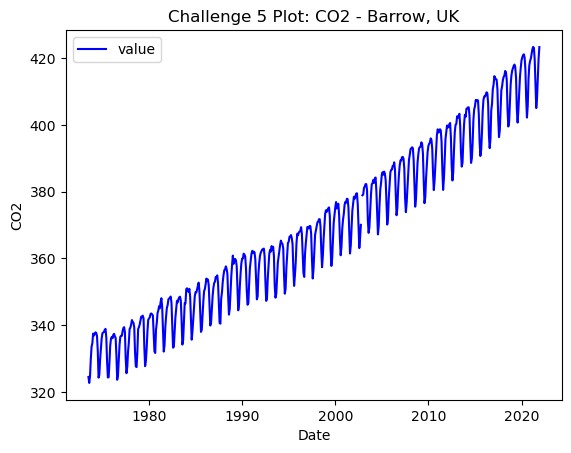

In [106]:
e, ax = plt.subplots()
emissions.plot(x="time_decimal",
                y="value",
                title="Challenge 5 Plot: CO2 - Barrow, UK",
                kind="line",
                color='blue',
                ax=ax)
ax.set(xlabel='Date',
       ylabel='CO2')
plt.show()